In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from context import *

# Outliers

## Definition

Outliers are data points that do not conform to the majority pattern of the dataset.
They stand out, they are exceptionnal, they are solitary.
There are multiple ways in which a point, or a set of points, can be uncommon.
The most simple way to define an outlier is a point which have a value far removed from the rest of the dataset.
If the variable in question has a normal distribution, an outlier could be a point which is located multiple standard deviation away from the mean, like the example below.

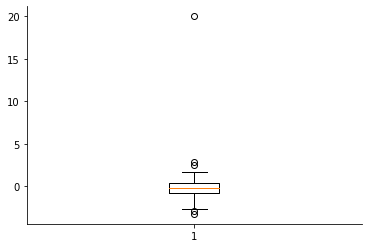

In [ ]:
data = np.random.normal(size=100)
data[-1] = 20

fig, ax = plt.subplots()
ax.boxplot(data);

However, it is also possible to have outliers without having a specific absurd value.
Even if each value separately is probable, it is possible that the combination of those values is outside the expected region.

In the following example, the coordinates of the orange point are not special by themselves.
However, this combination of values does not correspond to the standard interaction of those values in the rest of the dataset.
We expect the y axis to roughly be the cosine of the the x axis.
This relation does not hold for the orange point.
It is then an outlier.

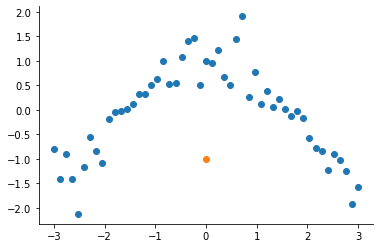

In [ ]:
fig, ax = plt.subplots()
n = 51
x = np.linspace(-3, 3, n)
noise = np.random.normal(0, 0.5, size=n)
y = np.cos(x) * (1 + noise)
ax.scatter(x, y)
ax.scatter([0], [-1]);

Finally, outliers may not be single points removed from any other points.
They can be a group of points removed from the rest.
Then, an ambiguity arises.
Are those points outliers, or an independent small cluster?
It is up to the analyst to investigate an treat those situations according to their business meaning.

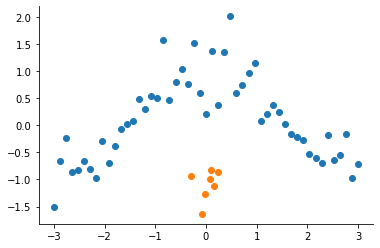

In [ ]:
fig, ax = plt.subplots()
n = 51
x = np.linspace(-3, 3, n)
noise = np.random.normal(0, 0.5, size=n)
y = np.cos(x) * (1 + noise)
ax.scatter(x, y)
ax.scatter(np.random.normal(0, 0.2, size=7), np.random.normal(-1, 0.2, size=7));

## Sources of outliers

The presence of outliers may have a large variety of explanations.
Depending on the source, the meaning and subsequent treatment of outliers must be adapted by the analyst.

Errors in the data is one of the most frequent case of outliers.
A human entering data manually may add a zero to a value, hence generating a number having ten times its expected value.
Equipment fault may also generate different types of outliers, as the mesured data may be significantly different than normal behaviour.

Another case of outlier, specially present in open data, is the imputation of missing values.
As we have seen in the course about missing values, one way to treat missingness is to impute an arbitrary value.
When no value has a particular business meaning, it is usual to impute a value that can be far from expected normal behaviours (human height being 99, ...).

Let's not forget that outliers may also be a natural part of the process under study.
There are certain situations in which we expect data to behave like a Gaussian like for people sizes.
In this instance, we do not expect to get much more than two meters.
But in some way, a basketball player might appear like an outlier.
Also, if we look at the salary across a population, most of the people will have a salary around the minimal allowance in the country in question. 
However, we might well end up with a person who earns a million euro per year or even more.
These persons are clearly outliers but do not correspond to data errors.
This situation is quite usual when looking at data that follow a power law in instead of a Gaussian.

## Impact of outliers

The presence of outliers can have major impact on analyses if not properly controlled.
These data may contribute to statistical indicators in significant ways, up to changing to meaning of those indicators.

Let's first look at the impact of an outlier on one of the most simple statistical indicator : the mean.

('mean', 0.06458262947981522)

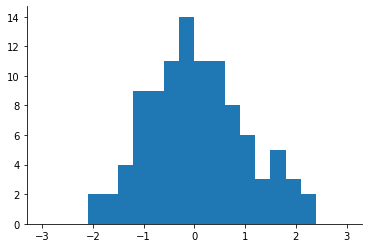

In [ ]:
np.random.seed(43)
data = np.random.normal(size=100)
plt.hist(data, bins=np.linspace(-3, 3, 21))
"mean", data.mean()

We generated a simple dataset of mean 0 and RMS 1.
The plot of the data is as expected : a majority of the data is around 0.
So the average of 0.065 corresponds to a central value of the distribution.
Now let's look at the impact of adding an outlier.

('mean', 1.0587245212070675)

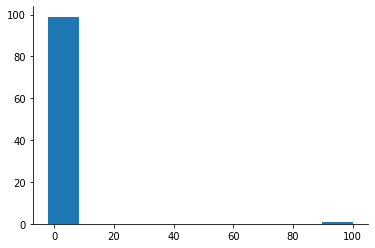

In [ ]:
data[-1] = 100
plt.hist(data)
"mean", data.mean()

In term of visualisation we observe something known.
Because the maximum value is an outlier, all the meaningful data are compressed into a single bin.
It is impossible for the analyst to evaluate what normal values are.
They fall roughly between -5 and 10.
We can't know if they are of the order of 1 or 0.01.
We also observe the mean have been significantly shifted.
It is now actually larger than the largest of the normal points.
The mean is now useless.

Another statistical indicator that is significantly changed by outliers is the RMS.
The impact of outliers is even larger due to the fact that the square of the value is considered.
The dataset with an outlier has now a RMS 14 times larger than initially.

In [ ]:
data.std()

9.990095190720343

## Identifying outliers

Given their power of disruption an their potential business value, it is essential to identify early the presence of outliers.
Several techniques exist, with various assumptions on the data and various strategies of identification.

We will use again the cancer dataset in this course.
This dataset can be gnerated with the following command from the root of the project directory.

`python -m src.data.cancer`

In [ ]:
raw = pd.read_parquet(INTDIR / 'breast_cancer.parquet')
print(raw.shape)
raw.head()

(569, 31)


mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean_fractal_dimension  ...  worst_texture  worst_perimeter  worst_area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst_smoothness  worst_compactness  worst_concavity  worst_concave_points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst_symmetry  worst_fractal_dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

### Show me the data

Our brain is extremely powerful in identifying outliers of a specific pattern.
We can leverage this power by plotting the data and watch whether some points can be seen as outliers.
We already have seen how an histogram behaves under univariate outliers.
We have also seen how a scatter plot may help to uncover multivariate outliers.
This strategy can also be extended to large dimension through the use of dimension reduction algorithms.

Here, we present a single variable in an histogram.
We already saw in previous courses that histograms of data presenting outliers are shifted toward one side.
In this case, the outlier is not as excessive as previous cases.
However, being twice as much as the regular maximum may be considered as an outlier.


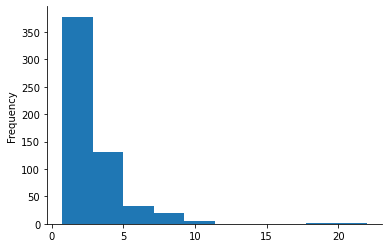

In [ ]:
raw['perimeter_error'].plot(kind="hist");

We can also discover outliers in two dimensions with the use of a scatter plot.
The human brain is good at identifiying points that lie far from the bulk.
In the following situation, the two dimensions have each 1D outliers and the scatter plot allows a quick observation.
For more dimensions, the analyst may consider a dimension reduction technique.
However, because there is a notion of distance and interaction between dimensions, different techniques may have different effects on outliers (see exercice).

In [ ]:
outliers = (raw["perimeter_error"] > 15) | (raw["fractal_dimension_error"] > 0.015)
"Rate of outliers : {}%".format(np.round(outliers.mean() * 100, 2))

'Rate of outliers : 1.05%'

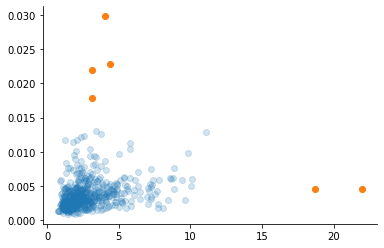

In [ ]:
fig, ax = plt.subplots()
ax.scatter(raw['perimeter_error'], raw["fractal_dimension_error"], alpha=0.2)
ax.scatter(
    raw.loc[outliers, 'perimeter_error'],
    raw.loc[outliers, "fractal_dimension_error"],
);

Univariate outliers will have a tendency to increase the RMS of a variable.
Hence PCA will have a tendency to align the main axes with those outliers.
As a result, outliers will more likely be outliers in the reduced dimension too.
UMAP will not help detecting a single multivariate outlier.
Instead, this point will be included in the closest cluster.
However, if the outliers create a small cluster, UMAP will separate this cluster in the embedding map.
Each algorithm will have its strengths and weaknesses to show outliers as such in low dimension.

### Modelisation

Computing basic statistics allows to have a first intuition about the presence of outliers.
We have seen earlier that univariate outliers are quite far from the bulk of the data.
We can use this property to isolate those points.

The first technique proposes to create an area were normal data lies.
In practice this area is created around the median of the data, which is not impacted by outliers.
Then data are considered outliers if they are further than n times (usually 2) the interquartile distance.
A similar technique using the mean and rms, called z-score also exists. 
However, as we have seen, it is more unstable if outliers are actually present.

Generally speaking, if the analyst can create a probabilistic formulation of the data distribution, it is possible to consider as outliers points which are the least probable under the theoretical formulation.
For example, if the data is supposed to be gaussian, points which are at least three times the standard deviation from the mean can be considered outliers.
Be cautious however at how outliers may impact the parameters if the probabilistic data distribution is fitted on the data.
Be also cautious about your amount of data. 
If one define outliers to have a probability to appear below 0.1%, then we actually expect 10 of them if the dataset contains 10k data points.

In [ ]:
from scipy.stats import iqr

d = iqr(data, rng=[25, 75])
d

1.4472269666985969

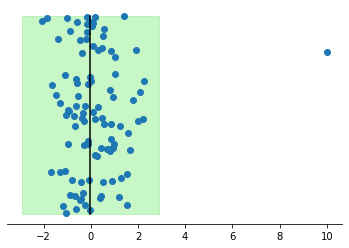

In [ ]:
fig, ax = plt.subplots()
data[-1] = 10

ax.fill_between([-2 * d, 2 * d], [0, 0], [1, 1], color="lightgreen", alpha=0.5)
ax.scatter(data, np.random.uniform(size=len(data)))
ax.plot([np.median(data)] * 2, [0, 1], color="black")
ax.get_yaxis().set_visible(False)
ax.spines["left"].set_visible(False);

### Dedicated algorithms

Several algorithms have been designed specifically for outlier detection.
These algorithms are meant to identify multivariate outliers.
As a result, they may make various assumptions on the data, that the analyst must understand in order to leverage them properly.
In particular, some algorithms use the notion of distance between instances.
It is worth to remind that an outlier point may not exhibit any specific behaviour if the distance definition is not adapted to its uniqueness.

#### DBSCAN

We already saw DBSCAN in the course about clustering.
In particular, DBSCAN has a property ```min_samples``` which designate all points with less neighbours within ```eps``` than this value to be outliers.
DBSCAN is then naturally able to identify points which do not belong to a cluster.
It is even able to detect mini clusters of outliers, as long as the clusters is smaller than ```min_samples```.

![Alt Text](../../figures/dbscan.gif)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

dbscan = DBSCAN(eps=0.5, min_samples=2)
normed = StandardScaler().fit_transform(
    raw[["perimeter_error", "fractal_dimension_error"]]
)
transformed = dbscan.fit_predict(normed)

In [ ]:
detected = transformed == -1

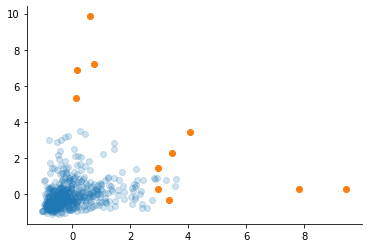

In [ ]:
fig, ax = plt.subplots()
ax.scatter(normed[:, 0], normed[:, 1], alpha=0.2)
ax.scatter(normed[detected, 0], normed[detected, 1]);

Here DBSCAN has properly identified the extreme 1D points on each axis. 
It has also identified points around 3 on the x axis, which seem isolated even though their values on each axis are not extreme.
Another interesting point is that DBSCAN considered that some points in between those outliers are correctly clustered points because their are slightly more dense.

#### Local outlier factor

The local outlier factor consist in comparing the average distance of a point to its neighbours, versius the average distance of those neighbours to their own neighbours.
If points belong to the same group, they will have similar distances to their neighbours. 
An outlier will be further away to its neighbours that is expected.

Imagine you live in the countryside with a large estate. 
All your neighbours are in the same situation.
They it is a normal situation to be at a couple hundred meters from your neighbours.
However in the city, everyone lives a couple meters away. 
The average distances are different but also the context so it is a normal behaviour.
Now imagine that you live in central park. 
All your closest neighbours will live a couple hundred meters from you, but they will live very close to their closest neighbours.
Then you look very isolated in a context of density : you are an outlier.
The following image gives a visual representation of the workings of the local outlier factor.

`sklearn` proposes an implementation for this algorithm : `sklearn.neighbors.LocalOutlierFactor`.
By adapting the number of considered neighbours, this algorithm allows to detect mini clusters of outliers.

![https://scikit-learn.org/stable/_images/sphx_glr_plot_lof_outlier_detection_001.png](https://scikit-learn.org/stable/_images/sphx_glr_plot_lof_outlier_detection_001.png)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=15)
normed = StandardScaler().fit_transform(raw[["perimeter_error", "fractal_dimension_error"]])
labels = clf.fit_predict(normed)
detected = labels == -1

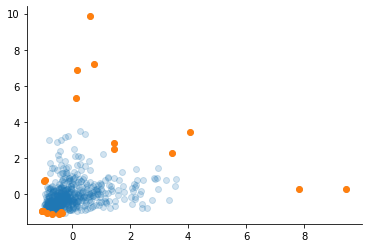

In [ ]:
fig, ax = plt.subplots()
ax.scatter(normed[:, 0], normed[:, 1], alpha=0.2)
ax.scatter(normed[detected, 0], normed[detected, 1]);

In this example, we see that this technique has tagged different points than DBSCAN.
Of course, the most obvious points are still well identified.
But the algorithm also identified bottom left points as outliers, while a human would hardly consider them so.
So why dit this happen?

If we look closely at this side of the plot (figure below), we see that those points seem to be a lower density areas.
Because they are low density points near high density points, they are labelled as outliers.
It is interesting to see that the difference of density of those points is very different to the more "standard" outliers.
This algorithm is then able to detect outliers even if the data has various clusters of various densities.
It is then up to the analyst to determine if those points should be considered outliers from a business point of view.

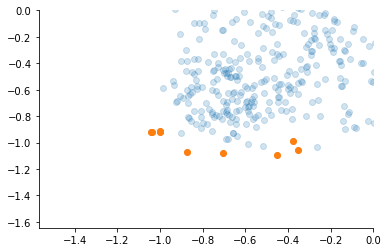

In [ ]:
fig, ax = plt.subplots()
ax.scatter(normed[:, 0], normed[:, 1], alpha=0.2)
ax.scatter(normed[detected, 0], normed[detected, 1])
ax.set_xlim(None, 0)
ax.set_ylim(None, 0);

#### Isolation Forest

Isolation forest is an algorithm based on the random forest algorithm.
The objective of this algorithm is to chose a random variable and to split the dataset in two using a random value of this variable.
The process is then repeated recursively in each partition until all points are separated.
With this strategy, because outliers are far from the bulk of the data, there is more probability to choose a threshold between an outlier and the rest.
As a result, outliers will have a tendency to be isolated earlier in the tree.
By using multiple tree, we can identify points which seem to be systematically isolated early.

![https://engineering.linkedin.com/blog/2019/isolation-forest](https://content.linkedin.com/content/dam/engineering/site-assets/images/blog/posts/2019/08/IsolationForest1.png)
![https://scikit-learn.org/stable/_images/sphx_glr_plot_isolation_forest_001.png](https://scikit-learn.org/stable/_images/sphx_glr_plot_isolation_forest_001.png)

The isolation forest have the nice property to be independent of the scale of each variable.
There is no notion of distance one must be cautious of.
The only important notion is the ranking of instance with respect to each variables.
Each data point will get a score related to the average number of splits required to isolate it from the rest.
We can then define a threshold which will define outliers from core points.

In [ ]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(random_state=0).fit(normed)
probas = clf.decision_function(normed)

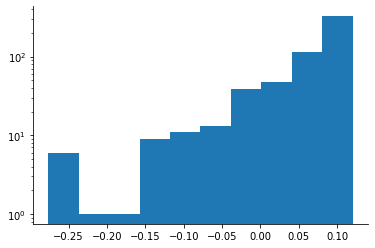

In [ ]:
fig, ax = plt.subplots()
ax.hist(probas)
ax.set_yscale("log");

In [ ]:
detected = probas < -0.17

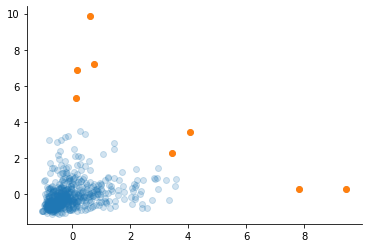

In [ ]:
fig, ax = plt.subplots()
ax.scatter(normed[:, 0], normed[:, 1], alpha=0.2)
ax.scatter(normed[detected, 0], normed[detected, 1]);

We defined the threshold at a value where there is a significative drop in the score representativity.
Wit this definition we get back the more obvious outliers.
Let's look at which core points would first be identified as outliers.
When increasing the threshold, the more external points get slowly integrated to the outliers.

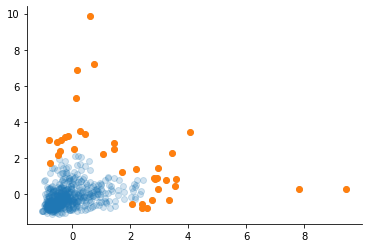

In [ ]:
detected = probas < -0.05
fig, ax = plt.subplots()
ax.scatter(normed[:, 0], normed[:, 1], alpha=0.2)
ax.scatter(normed[detected, 0], normed[detected, 1]);

## Dealing with outliers

Detecting outliers is only one part of the process.
Once identified, the analyst must decide what to do with them, in the light of the expected processed down the pipeline.
Multiple strategies exist with their relative strengths and weaknesses.

### Deletion

Deletion is a common action to deal with outliers.
Contrary to missing values, outliers are by definition a very small proportion of the data.
It does not cost much statistics to remove them from the dataset.
However, similarly to missing values, they could represent a significant part of the information contained in the dataset.
The analyst must take care of not biasing the dataset by removing them.
If the outliers are pure data error, it is usually safe to remove them.

### Take log

When data follow a power law distribution, the maximum values may be several orders of magnitude above the bulk of the data.
On solution to squeeze the data is to take the log of the data.
As a result, values separated by multiple orders of magnitude will be squeeze to low values.

Let's create a basic dataset of all the powers of ten.
The last point look as an outlier even though its is meaningful given the data.
When taking the log, all points are now evenly distributed.

In [ ]:
x = 10 ** np.arange(10)
x

array([         1,         10,        100,       1000,      10000,
           100000,    1000000,   10000000,  100000000, 1000000000])

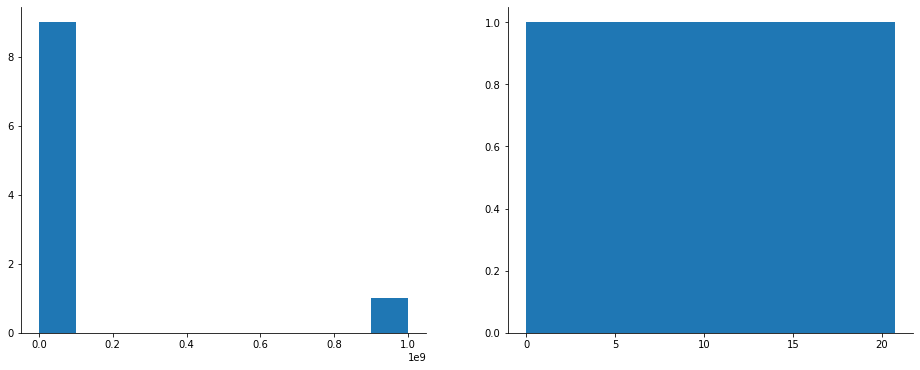

In [ ]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 6))
ax0.hist(x)
ax1.hist(np.log(x));

### Binning
Another way to limit the impact of outliers is to create a special category for them.
In the case of 1D outliers, it is possible to set a maximum value for the variable and set the outliers to this limit.
The impact of large values are then mitigated when dealing with distances.

In [ ]:
np.where(x > 1e4, 1e4, x)

array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+04, 1.e+04, 1.e+04,
       1.e+04, 1.e+04])

### Choose your algorithm wisely

The techniques proposed are always to be used in the light of the objectives of the analysis.
Depending on the situation, there may exist algorithms that are not sensitive to outliers.
The analyst may prefer such an algorithm.
This is the situation we already encountered at the begining of the lesson.
If one wishes to to describe simply a distribution, there is a choice between the median and the mean.
While the mean is the most popular choice, we have seen that it is sensitive to outliers.
In the presence of outliers, it is most sensible to use the median.

## Conclusion

Outliers are uncommon data that lie far from the main data distribution.
They can be of particular business importance, or perturbing statistical agregates or data science algorithms.
Detecting outliers is then essential to understand the dataset and manage the analytic process.
Multiple detection technique exist, relying on different strategies.
Once outliers are detected, the analyst must then choose a strategy to deal with them, in light of the objective of the analysis and and algorithms used downstream.

# Exercices

## Dimension reduction

Apply dimension reduction techniques to the columns `perimeter_error` and `fractal_dimension_se` from the cancer dataset and study how outliers are mapped.

## Interquartile

Apply the interquartile method for outlier detection on the `perimeter_error` column of the cancer dataset.
Interpret the results.
Then identify a parametrisation of the distribution and use a parametrised outlier detection.

## Gaussian mixture

Create the moon dataset and add multiple outliers.
Parametrise the dataset as a combination of multiple gaussians and identify a separation contour between legitimate points and outliers.

## Specific algorithm

Apply all presented algorithms to `perimeter_error` and `fractal_dimension_error` of the cancer dataset.
Understand how changing the various parameters may impact the results in this simple situation.
Understand how the definition of outlier varies from one algorithm to the next.